# Bilag 1- En undersøgelse af RHD datasættet
fra https://lmb.informatik.uni-freiburg.de/resources/datasets/RenderedHandposeDataset.en.html.

In [1]:
import os
import cv2
import sys
import pickle
import numpy as np
import matplotlib.pyplot as plt

Hjælper imports til projektet, disse findes i https://github.com/ClausHolmgaard/SVPGestureRec/blob/master/Helpers/RHDHelpers.py

In [2]:
# Tilføj biblioteket et niveau over til sys.path
HELPERS_PATH = os.path.abspath("..")
if not HELPERS_PATH in sys.path:
    sys.path.append(HELPERS_PATH)
    
from Helpers.RHDHelpers import *

Først, referencer til filer og bibilioteker.

In [3]:
TRAIN_PATH = os.path.expanduser("~/datasets/RHD/RHD_published_v2/training")
ANNOTATIONS_FILE = os.path.join(TRAIN_PATH, "anno_training.pickle")
IMAGE_PATH = os.path.join(TRAIN_PATH, "color")

Fra readme filen, ved vi at følgende data er tilgængelig:

Keypoints available:<br>
0: left wrist, 1-4: left thumb [tip to palm], 5-8: left index, ..., 17-20: left pinky,<br>
21: right wrist, 22-25: right thumb, ..., 38-41: right pinky<br>
<br>
Segmentation masks available:<br>
0: background, 1: person, <br>
2-4: left thumb [tip to palm], 5-7: left index, ..., 14-16: left pinky, 17: palm, <br>
18-20: right thumb, ..., right palm: 33<br>
<br>
Hvilket betyder, der er 21 punkter tilgængelig på hver hånd.

Filen der indeholder disse data, kan så åbnes, og læses ind.

In [4]:
with open(ANNOTATIONS_FILE, 'rb') as f:
    annotations = pickle.load(f)

Lad os vælge nogle index at kigge på.

In [5]:
ind = [2671, 13691, 11388, 16081, 2962, 29984, 15841, 2587, 22410, 33917]

Det følgende er en function, til at tegne punkterne på et billede.

In [6]:
def draw_points_on_image(image, hand, only_draw_visible=False):
    for p in hand:
        visible = p[2] != 0

        if not only_draw_visible:
            cv2.circle(image, (p[0], p[1]), 1, (0, 255, 0), thickness=2)
        else:
            if visible:
                cv2.circle(image, (p[0], p[1]), 1, (0, 255, 0), thickness=2)
        
    return image

De billeder der skal undersøges indlæses nu.

In [7]:
images = []
for c, i in enumerate(ind):
    im = load_image(IMAGE_PATH, i)
    
    left_hand = get_left_hand(i, annotations)
    right_hand = get_right_hand(i, annotations)
    
    im = draw_points_on_image(im, left_hand)
    im = draw_points_on_image(im, right_hand)

    images.append(im)

Billederne plottes så.

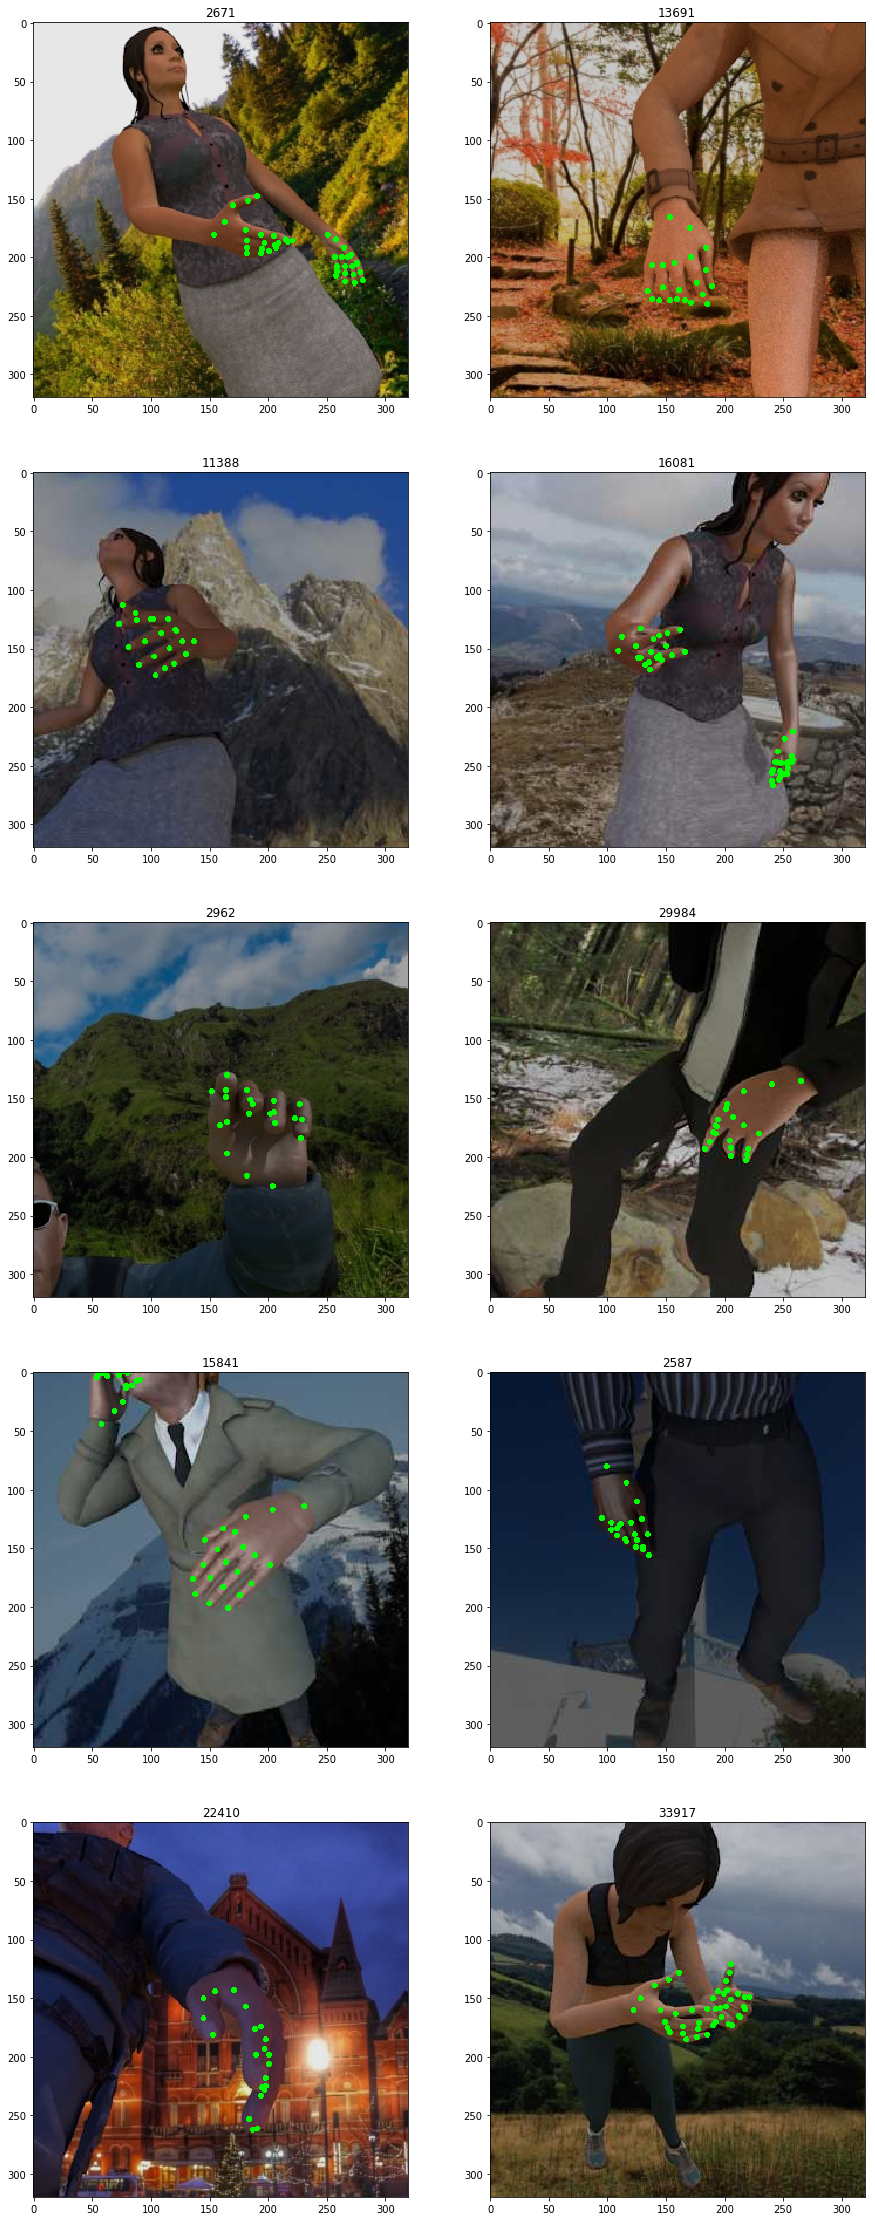

In [8]:
f, subs = plt.subplots(5, 2, figsize=(15, 40))
subs = subs.ravel()

for c, im in enumerate(images):
    subs[c].imshow(im)
    subs[c].set_title(ind[c])